# Fraud Detection Model Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# loading datset to a dateframe
data_frame = pd.read_csv('fraudTrain.csv')

# getting the month and year seperated from the dob column
data_frame['dob_year'] = pd.DatetimeIndex(data_frame['dob']).year
data_frame['dob_month'] = pd.DatetimeIndex(data_frame['dob']).month
data_frame = data_frame.drop(columns=['dob'])

X = data_frame[['dob_year', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
y = data_frame['is_fraud']

# scaling features
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, random_state=123)

# using for the imbalance of classes in the dataset
smote = SMOTE(random_state=123)
X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train)

### Training a random forest model with balanced class weights

In [2]:
random_forest_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
random_forest_model.fit(X_train_balance, y_train_balance)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### Using test set on the new model and printing metrics

In [4]:
# predict probabilities on the test set using a different threshold
probabilities = random_forest_model.predict_proba(X_test)

threshold = 0.45
new_predictions = np.where(probabilities[:, 1] > threshold, 1, 0)

print("Classification Report:\n")
print(classification_report(y_test, new_predictions))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, new_predictions))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.49      0.71      0.58      2252

    accuracy                           0.99    389003
   macro avg       0.74      0.85      0.79    389003
weighted avg       1.00      0.99      0.99    389003

Confusion Matrix:

[[385079   1672]
 [   658   1594]]


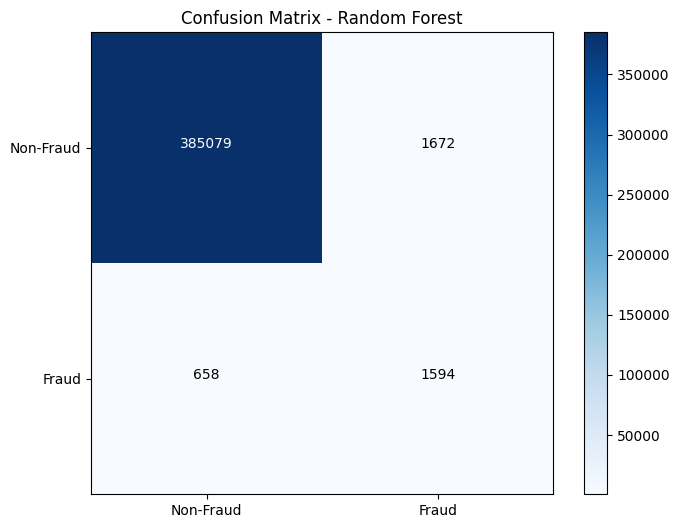

In [9]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, new_predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Fraud', 'Fraud'])
plt.yticks(tick_marks, ['Non-Fraud', 'Fraud'])


thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()